### Project Title: Customer Review Analysis
Today, customers are increasily buying from online.E-commerce platforms allow the customers to drop reviews and ratings for the products they buy.These reviews are usually from confirmed buyers.However, with thousands and millions of reviews on a product, one cannot easily say how the customers feel about a given product. Therefore a method will be needed to classify these reviews and this is where web scraping and text classification/ analysis comes in.

#### Problem statement
To scrape the reviews of customers about a particular product on Amazon and perform sentimental analysis to find out how they feel about the product.

#### Methodology
To perform web scraping, Python libraries *requests and BeautifulSoup* will be used. For sentimental analysis the *VADER(Valence Aware Dictionary sEntiment Reasoner)* NLTK library will be used.

#### Steps
1. Import Libraries
2. Downloading the webpages
3. Parsing the dowloaded web page(text document) in to an HTML document
4. Extracting the required information from the BeautifulSoup document(HTML).
5. Creating an automatic workflow of the webscraping process
   - Using for-loops
   - Uisng pagination
6. Saving and reading the data as a csv file
7. Sentiment Analysis




To be able to download the webpage and parse it into an html format, the python libraries *requests and BeautifulSoup* will be used.
- *Parse*:To parse data or information means to break it down into component parts so that its syntax can be analyzed, categorized, and understood.

#### (A) Web scraping for data

#### 1. Import Libraries

In [6]:
import requests
from bs4 import BeautifulSoup

#### 2. Downloading the webpage

To ensure that the target website that is about to be scraped does not see the traffic from 
our program as spam and not to get blocked by it, a header file will be created to contain a user agent( any Software acting behalf of user which enable the end-user to be able to interact with web contents.).



#### 2.1 User agent creation and webpage url

In [7]:
header = {'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/103.0.5060.114 Safari/537.36 Edg/103.0.1264.49'}

In [8]:
URL = 'https://www.amazon.co.uk/ASUS-Vivobook-L410MA-Microsoft-Subscription/product-reviews/B09MSGWJFR/ref=cm_cr_getr_d_paging_btm_prev_1?pageNumber=1'

The user_agent and url can now be used to download the webpage 

####  2.2 Downloading the web page using User-Agent and url

In [9]:
webpage = requests.get(URL, headers = header)

Checking whether the request was successful

In [10]:
webpage.status_code

200

Converting the webpage in to text.

In [11]:
webpage.text[:1000]

'<!doctype html><html lang="en-gb" class="a-no-js" data-19ax5a9jf="dingo"><!-- sp:feature:head-start -->\n<head><script>var aPageStart = (new Date()).getTime();</script><meta charset="utf-8"/>\n<!-- sp:end-feature:head-start -->\n<!-- sp:feature:csm:head-open-part1 -->\n\n<script type=\'text/javascript\'>var ue_t0=ue_t0||+new Date();</script>\n<!-- sp:end-feature:csm:head-open-part1 -->\n<!-- sp:feature:cs-optimization -->\n<meta http-equiv=\'x-dns-prefetch-control\' content=\'on\'>\n<link rel="dns-prefetch" href="https://images-eu.ssl-images-amazon.com">\n<link rel="dns-prefetch" href="https://m.media-amazon.com">\n<link rel="dns-prefetch" href="https://completion.amazon.com">\n<!-- sp:end-feature:cs-optimization -->\n<!-- sp:feature:csm:head-open-part2 -->\n<script type=\'text/javascript\'>\nwindow.ue_ihb = (window.ue_ihb || window.ueinit || 0) + 1;\nif (window.ue_ihb === 1) {\n\nvar ue_csm = window,\n    ue_hob = +new Date();\n(function(d){var e=d.ue=d.ue||{},f=Date.now||function(){

It could be observed from above that the text doccument type contains html tags but it is not yet broken down compnents part so that its syntax can easily be understood.This document will then be parsed to an html document using $BeautifulSoup$.

#### 3. Parsing the dowloaded web page(text document) in to an HTML document

In [12]:
soup = BeautifulSoup(webpage.text, 'html.parser')

Finding the different tags in the html document that contains each required information.

#### 4. Extracting the required information from the BeautifulSoup document(HTML)

1. Finding the tags that contain information on ratings

In [13]:
rate_tags = soup.find_all('i',{'data-hook':'review-star-rating'})

In [14]:
#rating tag
for tag in rate_tags:
    print(tag.text.replace('out of 5 stars','').strip())

5.0
5.0
5.0
5.0
5.0
5.0
4.0
5.0
4.0
5.0


2. Extracting the reviews titles

In [17]:
#Title tag
title_tags = soup.find_all('a',{'data-hook':'review-title'})
for tag in title_tags:
    title = tag.text.strip()
    print(title)

Fabulous
It's great
Nice laptop
laptop
Fab all rounder
excellent product
Assis 14” laptop
Amazing.
good price, good unit.
Perfect


3. Extracting reviews date

In [18]:
#review date
date_tag = soup.find_all('span',{'data-hook':'review-date'})

In [19]:
date_tag[0:3]

[<span class="a-size-base a-color-secondary review-date" data-hook="review-date">Reviewed in the United Kingdom on 9 September 2022</span>,
 <span class="a-size-base a-color-secondary review-date" data-hook="review-date">Reviewed in the United Kingdom on 6 September 2022</span>,
 <span class="a-size-base a-color-secondary review-date" data-hook="review-date">Reviewed in the United Kingdom on 10 September 2022</span>]

In [20]:
for dt_tag in date_tag:
    date = dt_tag.text.replace('Reviewed in the United Kingdom on','').strip()
    print(date[0:5])

9 Sep
6 Sep
10 Se
4 Sep
25 Au
23 Ju
30 Ap
3 Aug
10 Ju
7 Aug


4. Extracting reviews

In [21]:
#review
review_tag = soup.find_all('span', {'data-hook':'review-body'})

In [22]:
review_tag[0].text.strip()

"I've always had chromebooks so was looking for an affordable Windows laptop and this does the trick. Mainly wanted for streaming and can't fault so far. Good screen size and sound. Disappointing battery life though for constant streaming but doesn't take away from the overall product. Really pleased I purchased this and for £150 what's not to like!**Had a week now and still impressed but disappointed the keypad function is hit and miss in switching on and working **"

5. Extracting profile names

In [23]:
name_tags = soup.find_all('div',{'class':'a-section celwidget'})
for name in name_tags:
    name = name.find('span',{'class':'a-profile-name'}).text
    print(name)

Sarah Blackham
Peter
mark deegan
Kevin Buchanan
Viki Bond
lawrence mufwinda
Chazoninternational
Alex Benham
clin riou
George Roman


#### 5. Creating  an automatic workflow of the webscraping process

In [24]:
import pandas as pd
import numpy as np

#### 5.1 Using the for-loops

In [25]:
%%time
URLs,soup_docs,Rating,Title,Date,Review,profile_names = [],[],[],[],[],[],[]
pages = np.arange(1,5)
for x in pages:
    url = 'https://www.amazon.co.uk/ASUS-Vivobook-L410MA-Microsoft-Subscription/product-reviews/B09MSGWJFR/ref=cm_cr_getr_d_paging_btm_prev_1?ie=UTF8&reviewerType=all_reviews&pageNumber='+str(x)
    URLs.append(url)
for url in URLs:
    webpage = requests.get(url, headers = header)
    soup = BeautifulSoup(webpage.text,'html.parser')
    soup_docs.append(soup)
for soup_doc in soup_docs:
    rating_tags = soup_doc.find_all('i',{'data-hook':'review-star-rating'})
    title_tags = soup_doc.find_all('a',{'data-hook':'review-title'})
    date_tags = soup_doc.find_all('span',{'data-hook':'review-date'})
    review_tags = soup_doc.find_all('span', {'data-hook':'review-body'})
    name_tags = soup_doc.find_all('div',{'class':'a-section celwidget'})
    for rating in rating_tags:
        rating = float(rating.text.replace('out of 5 stars','').strip())
        Rating.append(rating)
    for title in title_tags:  
        title = title.text.strip()
        Title.append(title)
    for name in name_tags:
        name = name.find('span',{'class':'a-profile-name'}).text
        profile_names.append(name)
    for date in date_tags:
        date = date.text.replace('Reviewed in the United Kingdom on','').strip()
        Date.append(date)
    for review in review_tags:
        review = review.text.strip()
        Review.append(review)
review_df = pd.DataFrame({'Profile_name':profile_names,'Title':Title,'Rating':Rating,'Date':Date,'Review':Review})

Wall time: 7.26 s


In [26]:
review_df.head()

,Profile_name,Title,Rating,Date,Review
0,Sarah Blackham,Fabulous,5.0,9 September 2022,I've always had chromebooks so was looking for...
1,Peter,It's great,5.0,6 September 2022,Had it 3 days now finding it great at the begi...
2,mark deegan,Nice laptop,5.0,10 September 2022,Good price
3,Kevin Buchanan,laptop,5.0,4 September 2022,"this is my second asus, they are perfect lapto..."
4,Viki Bond,Fab all rounder,5.0,25 August 2022,Fab laptop does everything I need it to and si...


#### 5.2 Using pagination
Scraping just a few pages using the $for-loops$ is very easy as the number of pages can easily be gotten but for thousands or hundreds of webpages to be scraped automatically the for-loops becomes limited as one may not actually know the exact number of pages(Assuming one has to scrape all the web pages).Thus to facilitate the process  $Pagination$ is used.

In [20]:
u = 'https://www.amazon.co.uk/ASUS-Vivobook-L410MA-Microsoft-Subscription/product-reviews/B09MSGWJFR'
root_url = 'https://www.amazon.co.uk'
web = requests.get(u,headers = header)
so = BeautifulSoup(web.text, 'html.parser')
nextpage = so.find('ul',{'class':'a-pagination'})
ur = root_url + str(nextpage.find('li',{'class':'a-last'}).find('a')['href'])
print(ur)

https://www.amazon.co.uk/ASUS-Vivobook-L410MA-Microsoft-Subscription/product-reviews/B09MSGWJFR/ref=cm_cr_arp_d_paging_btm_2?ie=UTF8&pageNumber=2


#### An automatic workflow of the webscraping process using pagination

In [24]:
%%time
URLs,soup_docs,Rating,Title,Date,Review,profile_names = [],[],[],[],[],[],[]
#Get the urls
root_url ='https://www.amazon.co.uk'
url = 'https://www.amazon.co.uk/ASUS-Vivobook-L410MA-Microsoft-Subscription/product-reviews/B09MSGWJFR'
URLs.append(url)
def get_webpage(url):
    webpage = requests.get(url,headers = header)
    soup = BeautifulSoup(webpage.text, 'html.parser')
    return soup
def get_nextpage(soup):
    nextpage = soup.find('ul',{'class':'a-pagination'})
    if not nextpage.find('li',{'class':'a-disabled a-last'}):
        url = root_url+str(nextpage.find('li',{'class':'a-last'}).find('a')['href'])
        return url
    else:
        return
# URLs Extraction for the different web pages
while True:
    soup = get_webpage(url)
    url = get_nextpage(soup)
    if not url:
        break
    URLs.append(url)
# Data Extraction from the different web pages
for url in URLs:
    webpage = requests.get(url, headers = header)
    soup = BeautifulSoup(webpage.text,'html.parser')
    soup_docs.append(soup)
for soup_doc in soup_docs:
    rating_tags = soup_doc.find_all('i',{'data-hook':'review-star-rating'})
    title_tags = soup_doc.find_all('a',{'data-hook':'review-title'})
    date_tags = soup_doc.find_all('span',{'data-hook':'review-date'})
    review_tags = soup_doc.find_all('span', {'data-hook':'review-body'})
    name_tags = soup_doc.find_all('div',{'class':'a-section celwidget'})
    for rating in rating_tags:
        rating = float(rating.text.replace('out of 5 stars','').strip())
        Rating.append(rating)
    for title in title_tags:  
        title = title.text.strip()
        Title.append(title)
    for name in name_tags:
        name = name.find('span',{'class':'a-profile-name'}).text
        profile_names.append(name)
    for date in date_tags:
        date = date.text.replace('Reviewed in the United Kingdom on','').strip()
        Date.append(date)
    for review in review_tags:
        review = review.text.strip()
        Review.append(review)
review_df = pd.DataFrame({'Profile_name':profile_names,'Title':Title,'Rating':Rating,
                          'Date':Date,'Review':Review})

Wall time: 14.5 s


In [26]:
review_df.head()

,Profile_name,Title,Rating,Date,Review
0,Sarah Blackham,Fabulous,5.0,9 September 2022,I've always had chromebooks so was looking for...
1,Peter,It's great,5.0,6 September 2022,Had it 3 days now finding it great at the begi...
2,mark deegan,Nice laptop,5.0,10 September 2022,Good price
3,Kevin Buchanan,laptop,5.0,4 September 2022,"this is my second asus, they are perfect lapto..."
4,Viki Bond,Fab all rounder,5.0,25 August 2022,Fab laptop does everything I need it to and si...


#### 6. Saving and reading  the data as a csv file

In [27]:
review_df.to_csv('Amazon_ASUS_reviews.csv',index = False)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('Amazon_ASUS_reviews.csv')

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df.head()

,Profile_name,Title,Rating,Date,Review
0,Sarah Blackham,Fabulous,5.0,9 September 2022,I've always had chromebooks so was looking for...
1,Peter,It's great,5.0,6 September 2022,Had it 3 days now finding it great at the begi...
2,mark deegan,Nice laptop,5.0,10 September 2022,Good price
3,Kevin Buchanan,laptop,5.0,4 September 2022,"this is my second asus, they are perfect lapto..."
4,Viki Bond,Fab all rounder,5.0,25 August 2022,Fab laptop does everything I need it to and si...


The dataframe above consists of 38 reviews made in UK in 2022 about the ASUS Vivobook Laptop

#### B. Analysis

#### 1. Data Wrangling

In [4]:
#Dataframe Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Profile_name  38 non-null     object 
 1   Title         38 non-null     object 
 2   Rating        38 non-null     float64
 3   Date          38 non-null     object 
 4   Review        38 non-null     object 
dtypes: float64(1), object(4)
memory usage: 1.6+ KB


From the above information it shows that rating is the only column with numeric data while the rest of the columns contain categorical data.It could also be observed that there no NaN values in the dataset.

In [5]:
from jupyterthemes import jtplot
jtplot.style()

#### 2. Exploratory Data Analysis(EDA)
###### Question:
Which of the ratings has the highest occurence?

In [6]:
ratings = df['Rating'].value_counts().sort_values(ascending = False)

Text(0.5, 1.0, 'Counts per rating')

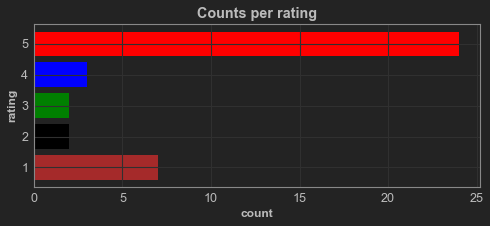

In [7]:
plt.figure(figsize = (8,3))
plt.barh(ratings.index,ratings.values,color = ['red','brown','blue','green','black'])
plt.xlabel('count', fontsize = 12,fontweight = 'bold')
plt.ylabel('rating', fontsize = 12,fontweight = 'bold')
plt.title('Counts per rating', fontweight = 'bold')

In [8]:
df['Rating'].value_counts(normalize = True)*100

5.0    63.157895
1.0    18.421053
4.0     7.894737
3.0     5.263158
2.0     5.263158
Name: Rating, dtype: float64

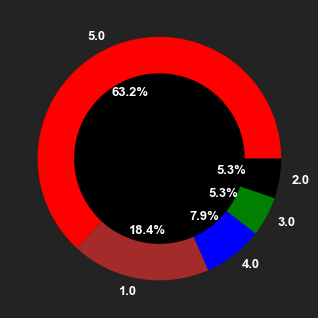

In [9]:
colors = ['red','brown','blue','green','black']
plt.pie(ratings.values,labels = ratings.index,colors = colors,autopct = '%.1f%%',
        textprops = {'fontsize':13, 'color':'w','fontweight':'bold'})
circle = plt.Circle((0,0),0.7,color = 'black')
p = plt.gcf()
p.gca().add_artist(circle)
plt.show()

The reviews are categorized on an overall rating scale of 1 to 5, with 1 being the lowest approval and 5 being the highest.From the above information it could be observed that about 63% of customers rated the product(ASUS Vivobook Laptop) as 5.0. It could be assume that most of the customers having a positive feeling about the profuct.

### 3. Sentiment Analysis and NLTK Basics

In [10]:
#Tokenization using NLTK
import nltk
text = df['Review'][0]
tokens = nltk.word_tokenize(text)
tokens[:5]

['I', "'ve", 'always', 'had', 'chromebooks']

In [11]:
#Identifying part of speech of each word in a sentense
tags = nltk.pos_tag(tokens)
tags[:2]

[('I', 'PRP'), ("'ve", 'VBP')]

#### 3.1 VADER Sentiment Scoring
NLTK's *SentimentIntensityAnalyzer* will be used get the positive, neutral and negative scores of a text.VADER uses a Bag of word approach.A text is tokenized,stop words and special characters removed,each root word in the text is scored and combined to a total score.

In [12]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

In [13]:
df.columns

Index(['Profile_name', 'Title', 'Rating', 'Date', 'Review'], dtype='object')

In [14]:
df = df.reset_index().rename(columns = {'index':'Id'})

In [15]:
df.head()

,Id,Profile_name,Title,Rating,Date,Review
0,0,Sarah Blackham,Fabulous,5.0,9 September 2022,I've always had chromebooks so was looking for...
1,1,Peter,It's great,5.0,6 September 2022,Had it 3 days now finding it great at the begi...
2,2,mark deegan,Nice laptop,5.0,10 September 2022,Good price
3,3,Kevin Buchanan,laptop,5.0,4 September 2022,"this is my second asus, they are perfect lapto..."
4,4,Viki Bond,Fab all rounder,5.0,25 August 2022,Fab laptop does everything I need it to and si...


In [16]:
# Building a sentiment Intensity analyzer
sia = SentimentIntensityAnalyzer()

In [17]:
sia.polarity_scores(df['Review'][0])

{'neg': 0.102, 'neu': 0.761, 'pos': 0.137, 'compound': 0.6369}

In [18]:
df['Review'][0]

"I've always had chromebooks so was looking for an affordable Windows laptop and this does the trick. Mainly wanted for streaming and can't fault so far. Good screen size and sound. Disappointing battery life though for constant streaming but doesn't take away from the overall product. Really pleased I purchased this and for £150 what's not to like!**Had a week now and still impressed but disappointed the keypad function is hit and miss in switching on and working **"

In [19]:
#Running sia on the whole dataset.This could done by iterating through the dataframe
result = {}
for i, row in tqdm(df.iterrows(), total = len(df)):
    text = row['Review']
    ID =   row['Id']
    result[ID] = sia.polarity_scores(text) 

  0%|          | 0/38 [00:00<?, ?it/s]

In [20]:
sent_df=pd.DataFrame(result).T

In [21]:

sent_df.head()

,neg,neu,pos,compound
0,0.102,0.761,0.137,0.6369
1,0.020,0.648,0.332,0.9798
2,0.000,0.256,0.744,0.4404
3,0.000,0.730,0.270,0.5719
4,0.000,0.769,0.231,0.4588


In [22]:
#Merging the sentiment scores with the original dataframe
sent_df = sent_df.reset_index().rename(columns = {'index':'Id'})

In [23]:
vader = sent_df.merge(df, how = 'left')

In [24]:
#The data frame below consist of sentiments, scores and meta data
vader.head(3)

,Id,neg,neu,pos,compound,Profile_name,Title,Rating,Date,Review
0,0,0.102,0.761,0.137,0.6369,Sarah Blackham,Fabulous,5.0,9 September 2022,I've always had chromebooks so was looking for...
1,1,0.020,0.648,0.332,0.9798,Peter,It's great,5.0,6 September 2022,Had it 3 days now finding it great at the begi...
2,2,0.000,0.256,0.744,0.4404,mark deegan,Nice laptop,5.0,10 September 2022,Good price


#### Visualizing the relationship between polarity scores  of the reviews and ratings

Text(0.5, 1.0, 'Rating vs polarity_score')

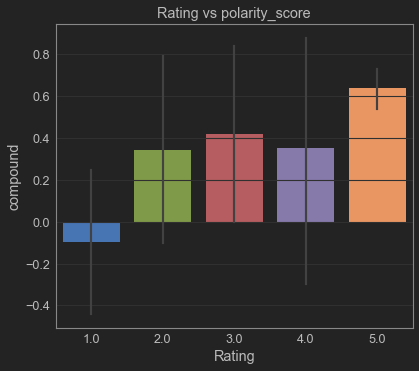

In [25]:
import seaborn as sns
sns.barplot(data = vader, x = 'Rating',y = 'compound')
plt.title('Rating vs polarity_score')

It could be observed from the bar chart above that as the rating increases the review score(compound) also increases. But some customers rated the product as 4.0 but their reviews were less positive.

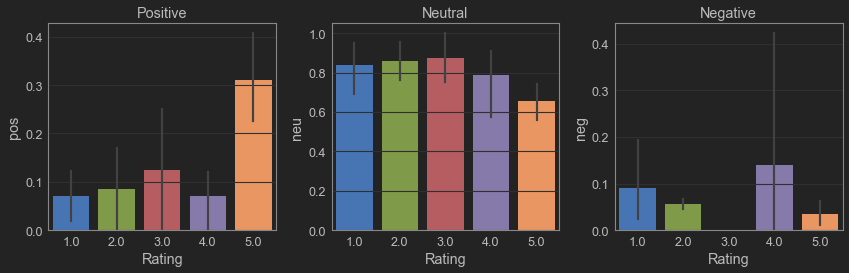

In [26]:
fig,ax = plt.subplots(1,3,figsize = (12,4))
sns.barplot(data = vader, x = 'Rating',y = 'pos',ax = ax[0])
sns.barplot(data = vader, x = 'Rating',y = 'neu',ax = ax[1])
sns.barplot(data = vader, x = 'Rating',y = 'neg',ax = ax[2])
ax[0].set_title('Positive')
ax[1].set_title('Neutral')
ax[2].set_title('Negative')
fig.tight_layout()

It could be observed from above that;
1. As the rating increases so too the text becomes more and more positive
2. Some customers rated the product high(rating = 4.0) but the reviews they made were more negative or neutral.

Below is the standard scoring metric followed by most of the sentiment analyzers.
1. Positive sentiment: compound score >= 0.05
2. Neutral sentiment: (compound score > -0.05) and (compound score < 0.05)
3. Negative sentiment: compound score <= -0.05

In [27]:
Positive = vader[(vader['compound']>= 0.05)]
Neutral = vader[(vader['compound']> -0.05)&(vader['compound']<= 0.05)]
Negative = vader[(vader['compound']<= -0.05)]

In [28]:
print('len_pos:{} len_neu:{} len_neg:{}'.format(len(Positive),len(Neutral),len(Negative)))

len_pos:29 len_neu:4 len_neg:5


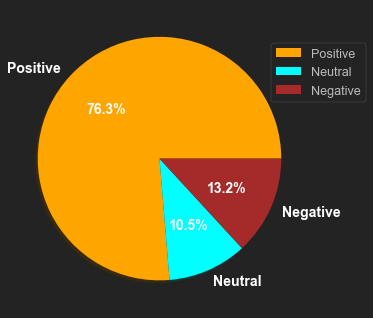

In [29]:
import warnings
warnings.filterwarnings('ignore')
values = [len(Positive),len(Neutral),len(Negative)]
labels =  ['Positive','Neutral','Negative']
colors = [ "orange","cyan", "brown","grey"] 
plt.pie(values, labels = labels, autopct = '%.1f%%',shadow = True, colors = colors,
        textprops={'fontsize': 14,'fontweight' :'bold','color':'w'})
plt.legend(bbox_to_anchor = (0.8,0.5,0.4,0.4))

From the results of the VADER model, 76% of the reviews were positve, 11 neutral and 13 negative.Though the dataset is too small, it could still be concluded that the product,ASUS Vivobook Laptop will be successful in the market since most customers may develop poitive feelings about the product due to the positive reviews made by the previous customers.  

#### Top 5 positive and Negative reviews

In [56]:
pos_rev = vader[vader['compound']>=0.4][:5]['Review'].values

In [57]:
neg_rev = vader[vader['compound'] <= -0.05][:5]['Review'].values

In [58]:
pos_neg_revs = pd.DataFrame({'Pos':pos_rev,'Neg':neg_rev})

In [60]:
pos_neg_revs

,Pos,Neg
0,I've always had chromebooks so was looking for...,No sd card slot.
1,Had it 3 days now finding it great at the begi...,Bought this laptop as have had ASUS before and...
2,Good price,The ausu didn't come with a misco slot as it ...
3,"this is my second asus, they are perfect lapto...",Not as advertised would not have bought it had...
4,Fab laptop does everything I need it to and si...,Very slow. Freezes regularly wouldn’t recommen...


#### Common Reviews

#### References
data :https://www.amazon.co.uk/ASUS-Vivobook-L410MA-Microsoft-Subscription/product-reviews

#### Further work
Thousands of customers reviews will be scrapped from the Amazon site using Pagination and ML models from sklearn will be used to perform sentiment analysis.

In [51]:
import jovian


In [52]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Please enter your API key ( from https://jovian.ai/ ):
API KEY: ········
[jovian] Committed successfully! https://jovian.ai/abehsongkiss/costomer-review-analysis-041c7


'https://jovian.ai/abehsongkiss/costomer-review-analysis-041c7'